# Logictic Regression Case Study - Lead Scoring

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### Business Goal:

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals of the Case Study:

1) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2) There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### Major steps taken to solve this case study are:

- Reading and understanding the data
- Visualizing and Cleaning the Data
- Prepare the data for Model Building
- Model Building and Evaluation
- Making Predictions on the Test Set

# Step 1: Reading and understanding the data

In [408]:
# importing required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [409]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [410]:
# Importing the data using Pandas
leads_df = pd.read_csv("Leads.csv")

# Checking the first few entries of the data
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [411]:
# Inspect the shape of the dataset (Number of rows - 9240 and Number of columns - 37)
leads_df.shape

(9240, 37)

In [412]:
# Inspect the different columns in the dataset
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [413]:
# Checking info of the dataset to see dtypes of the columns and the null values present in the columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [414]:
# Checking the statistical summary of the dataset
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Step 2: Visualizing and Cleaning the data

#### Converting some categorical variables (Yes/No) to the binary format (0/1)
#### 1. Do not Email & 2. Do Not Call

In [415]:
#Creating another data frame to make the required changes
leads_xed = leads_df

In [416]:
#Inspecting the different values in the variable (Do not Email)
leads_xed['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [417]:
#Inspecting the different values in the variable (Do not Call)
leads_xed['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [418]:
#Converting the variables to the binary format

#List of variables required for mapping
varlist =  ['Do Not Email','Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_xed[varlist] = leads_xed[varlist].apply(binary_map)

In [419]:
#checking the different values of the variables again to see the required changes

In [420]:
leads_xed['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [421]:
leads_xed['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

#### Converting few more categorical variables (Yes/No) to the binary format (0/1)

#### Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque & A free copy of Mastering The Interview

In [422]:
#Converting the variables to the binary format

#List of variables required for mapping
varlist1 =  ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Applying the function to the above list of variables
leads_xed[varlist1] = leads_xed[varlist1].apply(binary_map)

In [423]:
#Inspecting the first few rows of the dataframe to check the above made changes.
leads_xed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

#### Univariate analysis for inspecting the above updated variables with Countplots & Subplots

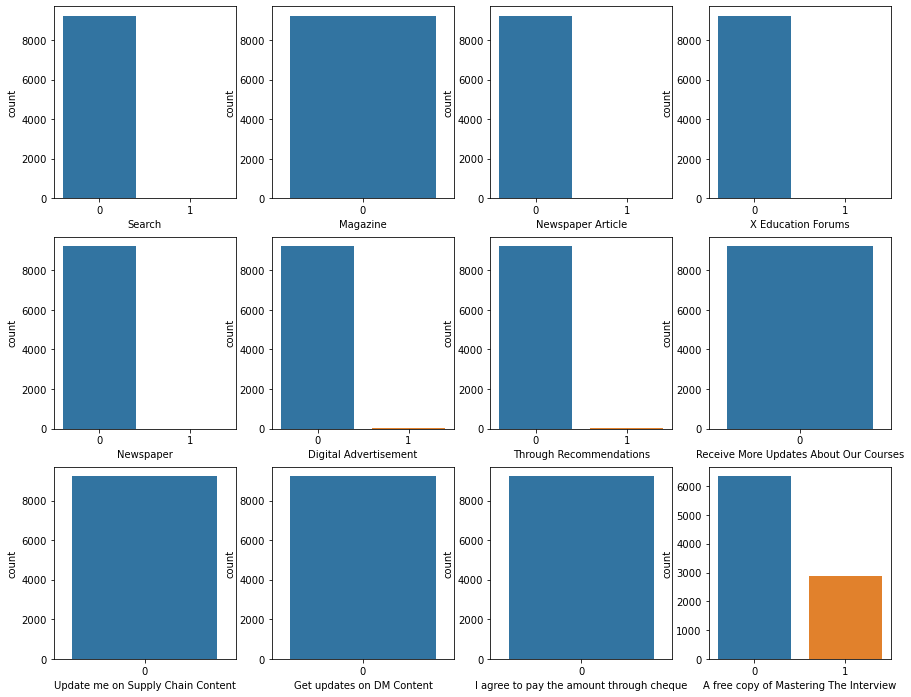

In [424]:
plt.figure(figsize=(15, 12))
plt.subplot(3,4,1)
sns.countplot(x = 'Search', data = leads_xed)
plt.subplot(3,4,2)
sns.countplot(x = 'Magazine', data = leads_xed)
plt.subplot(3,4,3)
sns.countplot(x = 'Newspaper Article', data = leads_xed)
plt.subplot(3,4,4)
sns.countplot(x = 'X Education Forums', data = leads_xed)
plt.subplot(3,4,5)
sns.countplot(x = 'Newspaper', data = leads_xed)
plt.subplot(3,4,6)
sns.countplot(x = 'Digital Advertisement', data = leads_xed)
plt.subplot(3,4,7)
sns.countplot(x = 'Through Recommendations', data = leads_xed)
plt.subplot(3,4,8)
sns.countplot(x = 'Receive More Updates About Our Courses', data = leads_xed)
plt.subplot(3,4,9)
sns.countplot(x = 'Update me on Supply Chain Content', data = leads_xed)
plt.subplot(3,4,10)
sns.countplot(x = 'Get updates on DM Content', data = leads_xed)
plt.subplot(3,4,11)
sns.countplot(x = 'I agree to pay the amount through cheque', data = leads_xed)
plt.subplot(3,4,12)
sns.countplot(x = 'A free copy of Mastering The Interview', data = leads_xed)
plt.show()

#### From these plots we can observe that few variables (Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content & I agree to pay the amount through cheque) all the responses are negative. Hence, these variables can be dropped from the data set as they have no impact on the target variable.

In [425]:
#Dropping the above mentioned 5 variables from the dataframe
leads_xed.drop('Magazine',axis = 1, inplace = True) 
leads_xed.drop('Receive More Updates About Our Courses',axis = 1, inplace = True) 
leads_xed.drop('Update me on Supply Chain Content',axis = 1, inplace = True) 
leads_xed.drop('Get updates on DM Content',axis = 1, inplace = True) 
leads_xed.drop('I agree to pay the amount through cheque',axis = 1, inplace = True)

In [426]:
#Inspecting the first few rows of the dataframe to check the above made changes.
leads_xed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High         

In [427]:
#Checking the shape of the dataframe to check the above made changes.
leads_xed.shape

(9240, 32)

Number of columns in original dataframe = 37 and 
Number of columns in modified dataframe = 32

#### In case of few variables, there is an entry called 'Select'. This basically shows that the person has not chosen any input. This can therefore be replaced by NaN.

In [428]:
leads_xed = leads_xed.replace(['Select'],np.NaN)
leads_xed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance             NaN     NaN                   02.Medium   
1               NaN             NaN     NaN                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure             NaN  Mumbai                   02.Medium   
4          Might be             NaN  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High         

In the above dataframe we can clearly observe that the entry of select has been replaced with NaN

#### Missing value treatment

In [429]:
#Checking the % of missing values in each column
(leads_xed.isnull().sum()/len(leads_xed))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Obervations

The % of missing values are very high in case of several variables.

Below mentioned few variables have been updated by the sales team and would not be avaiable in the test data. Moreover, the missing % is very high, so we will drop these columns. We will examine some of these before dropping them.

- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Last Activity

#### Examining above mentioned few columns (Tags, Lead Quality, Lead Profile, Asymmetrique Profile Index and Last Activity)

In [430]:
leads_xed['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [431]:
leads_xed['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [432]:
leads_xed['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [433]:
leads_xed['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [434]:
leads_xed['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Dropping the columns which have been generated by the sales team, as these columns will not be availabe in case of test data.

In [435]:
leads_xed.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Activity'],axis = 1, inplace = True)

In [436]:
#Checking the % of missing values in each column again
(leads_xed.isnull().sum()/len(leads_xed))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

Now among the remaining variables, missing values are present in 9 variables and it is difficult to predict which ones would not be important. Hence, we cannot be determine which variables to drop despite high % of missing values.

- However, the column named 'How did you hear about X Education' has 78% missing values, therefore, we can drop this variable.
- Of the remaining, we can drop one column among 'City' and 'Country'. Here 'City' has high number of missing values than 'Country' so we can drop 'City'.

#### Dropping the columns 'How did you hear about X Education' and 'City'

In [437]:
leads_xed.drop(['How did you hear about X Education','City'],axis = 1, inplace = True) 

In [438]:
#Let's now check the percentage of missing values in each column again
(leads_xed.isnull().sum()/len(leads_xed))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

Now let us examine one by one each of the variables which has missing values. Without examining we cannot drop the missing rows as we will lose a large amount of data and we want to retain the columns as well since they might be important. We are going to analyse following variables (having high missing values)

- Country
- Specialization
- What is your current occupation
- What matters most to you in choosing a course

#### 1. Country

In [439]:
leads_xed['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

The column 'Country', has a very high number of features which makes it inconvenient to create dummy variables. Hence, we need merge few features together.

- Since majority of the values are 'India', we can merge all other countries together and code as 'Not India'.
- Also we can impute missing values as 'India' as well.

In [440]:
def country_map(x):
    if x == 'Not Given':
        return 'India'
    elif x== 'India':
        return 'India'
    else:
        return 'Not India'

leads_xed.Country = leads_xed.Country.fillna('Not Given')
leads_xed.Country = leads_xed.Country.apply(country_map)

In [441]:
leads_xed.Country.value_counts()

India        8953
Not India     287
Name: Country, dtype: int64

#### 2. Specialization

In [442]:
leads_xed['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

The column 'Specialization', has also very high number of features which makes it difficult to create dummy variables. Hence, again we need to merge few features together.

- Since majority of the values are related to 'Management', we can merge them together and code as 'Management'.
- Also we can replace missing values with 'NA'.

In [443]:
leads_xed.Specialization = leads_xed.Specialization.fillna('NA')

In [444]:
leads_xed['Specialization'].value_counts()

NA                                   3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

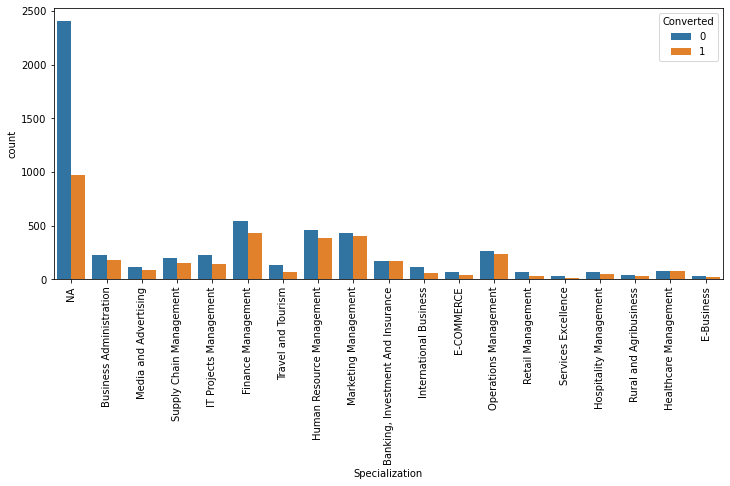

In [445]:
#Checking the spread of Specialization columnn 

plt.figure(figsize=(12,5))
s1=sns.countplot(leads_xed.Specialization, hue=leads_xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [446]:
#Merging all the management category of specialization together and code it as 'Management'
leads_xed['Specialization'] = leads_xed['Specialization'].replace(['Business Administration','Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management','Marketing Management','International Business','Operations Management', 'Retail Management','Hospitality Management','Healthcare Management'] ,'Management')  

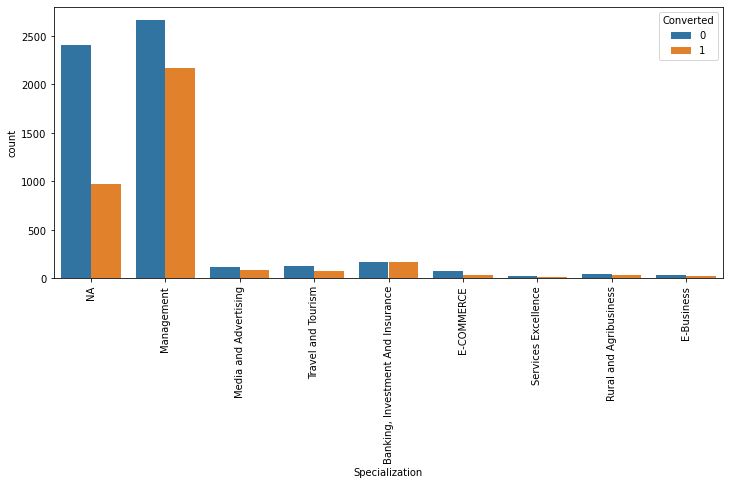

In [447]:
#Rechecking the spread of Specialization columnn 

plt.figure(figsize=(12,5))
s1=sns.countplot(leads_xed.Specialization, hue=leads_xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 3. What is your current occupation

In [448]:
leads_xed['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since Housewife and Businessman are very less in number so we can merge them in 'Other' category. Moreover, we can replace the missing values with 'NA'.

In [449]:
leads_xed['What is your current occupation'] = leads_xed['What is your current occupation'].fillna('NA')
leads_xed['What is your current occupation'] = leads_xed['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [450]:
leads_xed['What is your current occupation'].value_counts()

Unemployed              5600
NA                      2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

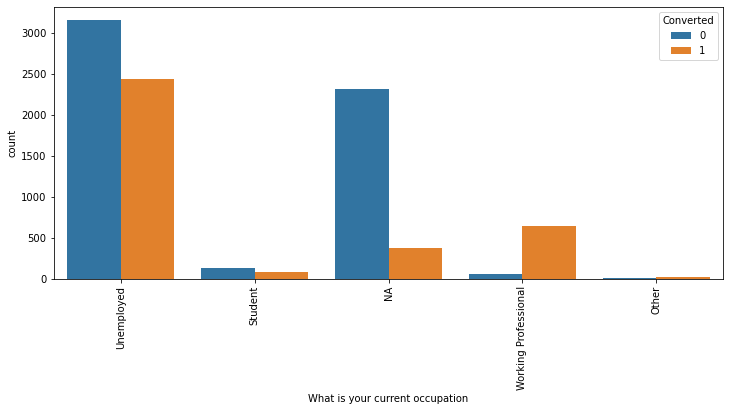

In [451]:
#Checking the spread of current occupation columnn 

plt.figure(figsize=(12,5))
s1=sns.countplot(leads_xed['What is your current occupation'], hue=leads_xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Here missing value can be imputed with Unemployed category as it is the largest category

In [452]:
leads_xed['What is your current occupation'] = leads_xed['What is your current occupation'].replace('NA' ,'Unemployed')

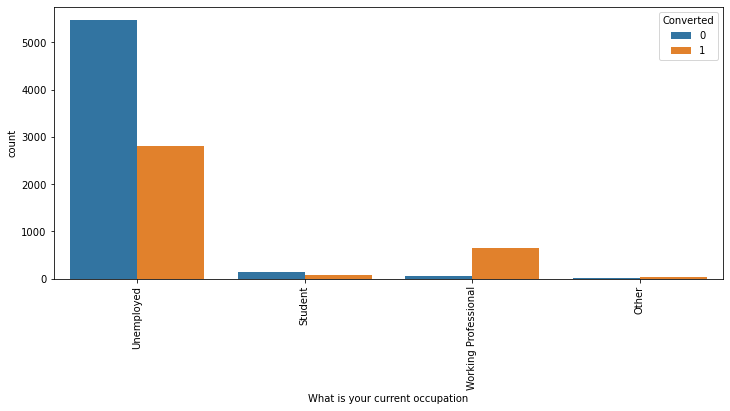

In [453]:
#Rechecking the spread of current occupation columnn again

plt.figure(figsize=(12,5))
s1=sns.countplot(leads_xed['What is your current occupation'], hue=leads_xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 4. What matters most to you in choosing a course

In [454]:
leads_xed['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The variable 'What matters most to you in choosing a course' has 3 features in which 'Better Career Prospects' has highest value and rest 2 are almost negligible. So we can drop this column as it seems this variable will not be very useful.

In [455]:
leads_xed.drop(['What matters most to you in choosing a course'],axis = 1, inplace = True) 

Rechecking the % of missing values in each column

In [456]:
# % of missing values in each column
(leads_xed.isnull().sum()/len(leads_xed))*100

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
A free copy of Mastering The In

Now only 3 columns have missing values and that is only ~1%. So let's check the overall missing %age so that we can delete these values in the rows in case of very small missing %age value.

In [457]:
#Checking the % of missing values in each column
100*((leads_xed.shape[0] - leads_xed.dropna().shape[0])/len(leads_xed))

1.7965367965367967

We found that the overall missing %age value is very small i.e. ~1.8% so deleting these values from the rows will not effect the further analysis.

In [458]:
leads_xed.dropna(axis=0,inplace = True)

In [459]:
#Rechecking the % of missing values in each column
(leads_xed.isnull().sum()/len(leads_xed))*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now there is no missing value in any column

In [460]:
# Rechecking the shape of the dataset again
leads_xed.shape

(9074, 21)

In [461]:
# Checking the name of the columns in the dataset again
leads_xed.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### After missing value treatment let's examine some other variables and dropping those that are not important 
1. Prospect ID
2. Lead Number 
3. Lead Origin 
4. Lead Source
5. Last Notable Activity

#### 1. Prospect ID

Prospect ID is a unique ID with which the customer is identified. So, it is an important column and we cannot drop it. So, let's make this the index.

In [462]:
#Making the Prospect ID as index
leads_xed.set_index('Prospect ID', inplace = True)

In [463]:
#Checking the dataframe
leads_xed.head()

Lead Number              Lead Origin  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

                                         Lead Source  Do Not Email  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620      Olark Chat             0   
2a272436-5132-4136-86fa-dcc88c88f482  Organic Search             0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Direct Traffic             0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Direct Traffic             0   
3256f628-e534-4826-9d63-4a8b88782852          Google             0   

                                      Do Not Call  Converted  TotalVisits  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620            0          0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482            0          0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a            0          1          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc            0          0          1.0   
3256f628-e534-4826-9d63-4a8b88782852            0          1          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit Country  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   India   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   India   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   India   

                                             Specialization  \
Prospect ID                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                     NA   
2a272436-5132-4136-86fa-dcc88c88f482                     NA   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Management   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                     NA   

                                     What is your current occupation  Search  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      Unemployed       0   
2a272436-5132-4136-86fa-dcc88c88f482                      Unemployed       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         Student       0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Unemployed       0   
3256f628-e534-4826-9d63-4a8b88782852                      Unemployed       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628

#### 2. Lead Number

Lead Number column refers to a lead number assigned to each lead procured. This variable has been assigned by X Education is of no value in this analysis. Hence, we can drop this.

In [464]:
#Dropping the Lead Number column
leads_xed.drop(['Lead Number'],axis = 1, inplace = True) 

In [465]:
#Checking the dataframe
leads_xed.head()

Lead Origin     Lead Source  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat   
2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic   
3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission          Google   

                                      Do Not Email  Do Not Call  Converted  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

                                      TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit Country  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   India   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   India   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   India   

                                             Specialization  \
Prospect ID                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                     NA   
2a272436-5132-4136-86fa-dcc88c88f482                     NA   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Management   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                     NA   

                                     What is your current occupation  Search  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      Unemployed       0   
2a272436-5132-4136-86fa-dcc88c88f482                      Unemployed       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         Student       0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Unemployed       0   
3256f628-e534-4826-9d63-4a8b88782852                      Unemployed       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                               

#### 3. Lead Origin

In [466]:
#Checking the value counts of all the features of this column
leads_xed['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

#### 4. Lead Source

In [467]:
#Checking the value counts of all the features of this column
leads_xed['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Lead Source column has many features which makes it difficult to create dummy variables. So, we need to merge few features together. Let's merge all the features from Facebook and below into one category 'Others'

In [468]:
#Merging all the features from Facebook and below into one category 'Others'
leads_xed['Lead Source'] = leads_xed['Lead Source'].replace(['Facebook','bing','google','Click2call','Social Media','Live Chat','Press_Release','blog','WeLearn','NC_EDM','youtubechannel','Pay per Click Ads','testone','welearnblog_Home'],'Others')

In [469]:
#Rechecking the value counts
leads_xed['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                59
Name: Lead Source, dtype: int64

#### 5. Last Notable Activity

In [470]:
#Checking the value counts of all the features of this column
leads_xed['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

Last Notable Activity column has also many features which makes it difficult to create dummy variables. So, we need to merge few features together. Let's merge all the features from Email Bounced and below into one category 'Others'

In [471]:
#Merging the levels of 'Last Notable Activity'
leads_xed['Last Notable Activity'] = leads_xed['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Email Received','View in browser link Clicked','Form Submitted on Website','Resubscribed to emails'],'Others')

In [472]:
#Rechecking the value counts of all the features of this column
leads_xed['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      158
Name: Last Notable Activity, dtype: int64

#### For categorical variables with multiple levels, create dummy features

In [473]:
leads_xed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10

We observed that following 6 categorical variables ar present in the dataframe. So, we need to create dummy variables for them.

In [474]:
# Creating a dummy variable for the categorical columns and dropping the first one.
dummy_vars = pd.get_dummies(leads_xed[['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)

In [475]:
# Adding the dummy variables to the master dataframe
leads_xed = pd.concat([leads_xed, dummy_vars], axis=1)

In [476]:
#Checking the dataframe after creation of dummy variables
leads_xed.head()

Lead Origin     Lead Source  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat   
2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic   
3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission          Google   

                                      Do Not Email  Do Not Call  Converted  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

                                      TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit Country  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0   India   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5   India   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0   India   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0   India   
3256f628-e534-4826-9d63-4a8b88782852                   1.0   India   

                                             Specialization  \
Prospect ID                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                     NA   
2a272436-5132-4136-86fa-dcc88c88f482                     NA   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             Management   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852                     NA   

                                     What is your current occupation  Search  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                      Unemployed       0   
2a272436-5132-4136-86fa-dcc88c88f482                      Unemployed       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         Student       0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                      Unemployed       0   
3256f628-e534-4826-9d63-4a8b88782852                      Unemployed       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                               

#### After creating dummy variables drop the repeated variable (original column)

In [477]:
# We have created dummies for the below variables, so we can drop them
leads_xed = leads_xed.drop(['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','Last Notable Activity'], 1)

In [478]:
#Checking the dataframe after dropping the repeated variables
leads_xed.head()

Do Not Email  Do Not Call  Converted  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

                                      TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  Search  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0       0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0       0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0       0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                                      Newspaper  Digital Advertisement  \
Prospect ID                                                              
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0                      0   
2a272436-5132-4136-86fa-dcc88c88f482          0                      0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0                      0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0                      0   
3256f628-e534-4826-9d63-4a8b88782852          0                      0   

                                      Through Recommendations  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                        0   
2a272436-5132-4136-86fa-dcc88c88f482                        0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                        0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                        0   
3256f628-e534-4826-9d63-4a8b88782852                        0   

                                      A free copy of Mastering The Interview  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                       0   
2a272436-5132-4136-86fa-dcc88c88f482                                       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                       1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                       0   
3256f628-e534-4826-9d63-4a8b88782852                                       0   

                                      Lead Origin_Land

In [479]:
#Checking the shape of the dataframe
leads_xed.shape

(9074, 41)

In [480]:
#Checking the info of the dataframe
leads_xed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Do Not Call                                           9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Search                                                9074 non-null   int64  
 7   Newspaper Article                                     9074 non-null   int64  
 

We can observe that now there is no object type column is present in the dataframe

#### Checking the outliers

Let's check the outlies for the following numerical variables by using boxplot

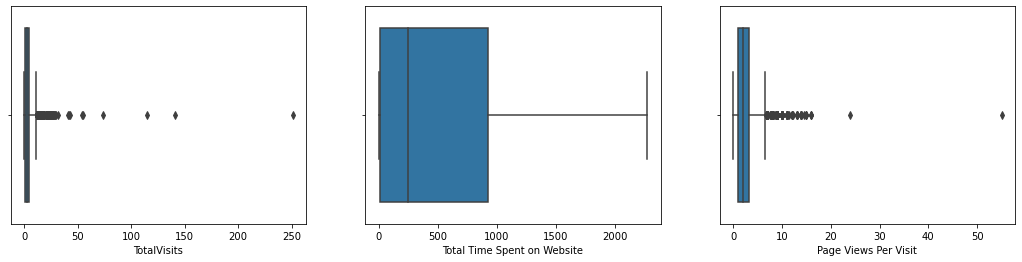

In [481]:
# Plotting the boxplot to check outliers in the variables
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'TotalVisits', data = leads_xed)
plt.subplot(1,3,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads_xed)
plt.subplot(1,3,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads_xed)
plt.show()

Among these 3 numerical variables there are no outliers for 'Total Time spent on website'. However, there are some outliers for 'Total Visits' and 'Page Views per visit'. Hence, we will drop the statistical outliers and the rest will be taken care of while scaling the data.

In [482]:
# Removing outliers from 'Total Visits' 
Q1 = leads_xed['TotalVisits'].quantile(0.05)
Q3 = leads_xed['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads_xed = leads_xed[(leads_xed['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_xed['TotalVisits'] <= Q3 + 1.5*IQR)]

In [483]:
# Removing outliers from 'Page Views Per Visit'
Q1 = leads_xed['Page Views Per Visit'].quantile(0.05)
Q3 = leads_xed['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_xed = leads_xed[(leads_xed['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_xed['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

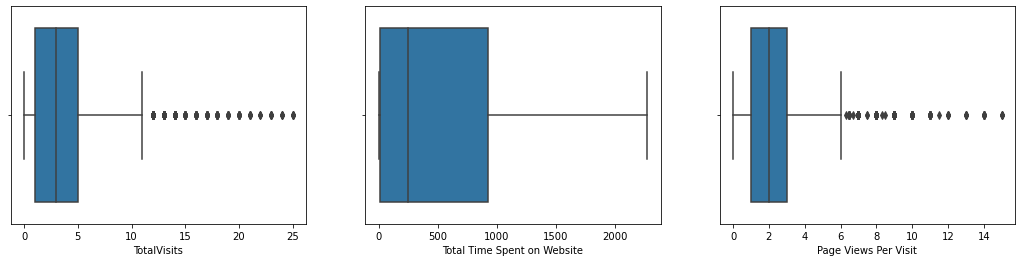

In [484]:
# Plotting the boxplot again to after removal of outliers in the variables
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'TotalVisits', data = leads_xed)
plt.subplot(1,3,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads_xed)
plt.subplot(1,3,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads_xed)
plt.show()

# Step 3: Prepare the data for Model Building

### Test-Train Split

In [485]:
# Putting feature variable to X
X = leads_xed.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          1.0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  Search  \
Prospect ID                                                          
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0       0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0       0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0       0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                                      Newspaper  Digital Advertisement  \
Prospect ID                                                              
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0                      0   
2a272436-5132-4136-86fa-dcc88c88f482          0                      0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0                      0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0                      0   
3256f628-e534-4826-9d63-4a8b88782852          0                      0   

                                      Through Recommendations  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620                        0   
2a272436-5132-4136-86fa-dcc88c88f482                        0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                        0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                        0   
3256f628-e534-4826-9d63-4a8b88782852                        0   

                                      A free copy of Mastering The Interview  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                       0   
2a272436-5132-4136-86fa-dcc88c88f482                                       0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                       1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                       0   
3256f628-e534-4826-9d63-4a8b88782852                                       0   

                                      Lead Origin_Landing Page Submission  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                    0   
2a272436-5132-4136-86fa-dcc88c88f482                                    0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                    1   
0cc2df48-7cf4-4e39-9de9-197

In [486]:
# Putting response variable to y
y = leads_xed['Converted']
y.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0
2a272436-5132-4136-86fa-dcc88c88f482    0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0
3256f628-e534-4826-9d63-4a8b88782852    1
Name: Converted, dtype: int64

In [487]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features using Standard Scaling Method

In [488]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  \
Prospect ID                                                                    
6d26530b-2250-405e-878d-34a2693d1c7e             0            0    -1.015121   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5             0            0    -1.015121   
d96d1ce9-7fb3-4970-b12a-257429d60218             0            0    -0.402157   
81666744-c8ed-4da7-9466-09fa71aa4445             0            0    -1.015121   
278795bb-797e-410e-84d6-38ce64efa3c8             0            0     0.517288   

                                      Total Time Spent on Website  \
Prospect ID                                                         
6d26530b-2250-405e-878d-34a2693d1c7e                    -0.878510   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5                    -0.878510   
d96d1ce9-7fb3-4970-b12a-257429d60218                    -0.071940   
81666744-c8ed-4da7-9466-09fa71aa4445                    -0.878510   
278795bb-797e-410e-84d6-38ce64efa3c8                     1.213416   

                                      Page Views Per Visit  Search  \
Prospect ID                                                          
6d26530b-2250-405e-878d-34a2693d1c7e             -1.145788       0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5             -1.145788       0   
d96d1ce9-7fb3-4970-b12a-257429d60218             -0.165214       0   
81666744-c8ed-4da7-9466-09fa71aa4445             -1.145788       0   
278795bb-797e-410e-84d6-38ce64efa3c8              1.305648       0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
6d26530b-2250-405e-878d-34a2693d1c7e                  0                   0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5                  0                   0   
d96d1ce9-7fb3-4970-b12a-257429d60218                  0                   0   
81666744-c8ed-4da7-9466-09fa71aa4445                  0                   0   
278795bb-797e-410e-84d6-38ce64efa3c8                  0                   0   

                                      Newspaper  Digital Advertisement  \
Prospect ID                                                              
6d26530b-2250-405e-878d-34a2693d1c7e          0                      0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0                      0   
d96d1ce9-7fb3-4970-b12a-257429d60218          0                      0   
81666744-c8ed-4da7-9466-09fa71aa4445          0                      0   
278795bb-797e-410e-84d6-38ce64efa3c8          0                      0   

                                      Through Recommendations  \
Prospect ID                                                     
6d26530b-2250-405e-878d-34a2693d1c7e                        0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5                        0   
d96d1ce9-7fb3-4970-b12a-257429d60218                        0   
81666744-c8ed-4da7-9466-09fa71aa4445                        0   
278795bb-797e-410e-84d6-38ce64efa3c8                        0   

                                      A free copy of Mastering The Interview  \
Prospect ID                                                                    
6d26530b-2250-405e-878d-34a2693d1c7e                                       0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5                                       0   
d96d1ce9-7fb3-4970-b12a-257429d60218                                       1   
81666744-c8ed-4da7-9466-09fa71aa4445                                       0   
278795bb-797e-410e-84d6-38ce64efa3c8                                       0   

                                      Lead Origin_Landing Page Submission  \
Prospect ID                                                                 
6d26530b-2250-405e-878d-34a2693d1c7e                                    0   
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5                                    0   
d96d1ce9-7fb3-4970-b12a-257429d60218                                    1   
81666744-c8ed-4da7-9466-09f

In [489]:
# Checking the Conversion Rate
Converted = (sum(leads_xed['Converted'])/len(leads_xed['Converted'].index))*100
Converted

37.8868258178603

#### Here we found around 38% conversion rate and which is good %age to build a model

#### Checking correlation between variables by plotting heatmap

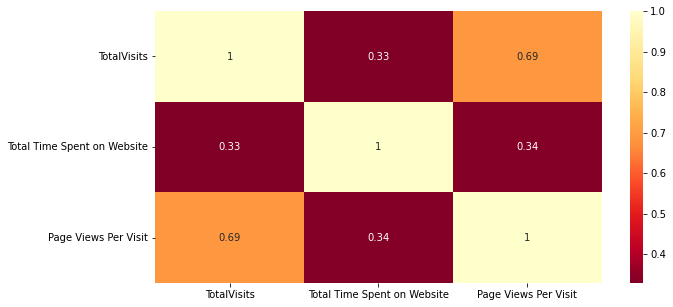

In [490]:
# Let's plot heatmap to check the correlation matrix for the quantitative variables
plt.figure(figsize = (10, 5))
sns.heatmap(leads_xed[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot = True, cmap="YlOrRd_r")
plt.show()

This heatmap is showing good correlation between 'Page Views Per Visit' and 'TotalVisits'.

# Step 4: Model building and evaluation

#### Feature Selection Using RFE

In [491]:
logreg = LogisticRegression()
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True])

In [492]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Search', False, 14),
 ('Newspaper Article', False, 4),
 ('X Education Forums', False, 9),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Not India', False, 12),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_Management', False, 25),
 ('Spe

In [493]:
#Checking the list of removed columns by RFE approach
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Country_Not India', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Management',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

#### Assessing the model by using statsmodel

#### Model 1

In [494]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.8
Date:                Sun, 10 Jul 2022   Deviance:                       5275.5
Time:                        23:46:39   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4514      0.236     -1.911      0.056      -0.914       0.012
Do Not Email                                            -1.5341      0.193     -7.947      0.000      -1.912      -1.156
Total Time Spent on Website                              1.0944      0.040     27.148      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.0238      0.129     -7.949      0.000      -1.276      -0.771
Lead Origin_Lead Add Form                                3.4763      0.242     14.387      0.000       3.003       3.950
Lead Origin_Lead Import                                  1.3489      0.503      2.684      0.007       0.364       2.334
Lead Source_Olark Chat                                   0.9778      0.121      8.094      0.000       0.741       1.215
Lead Source_Welingak Website                             3.1888      1.040      3.066      0.002       1.151       5.227
Specialization_NA                                       -1.1074      0.124     -8.955      0.000      -1.350      -0.865
What is your current occupation_Unemployed              -0.4854      0.202     -2.399      0.016      -0.882      -0.089
What is your current occupation_Working Professional     2.0866      0.272      7.678      0.000       1.554       2.619
Last Notable Activity_Email Opened                       0.6995      0.084      8.370      0.000       0.536       0.863
Last Notable Activity_Olark Chat Conversation           -0.8299      0.337     -2.461      0.014      -1.491      -0.169
Last Notable Activity_Others                             1.7415      0.279      6.246      0.000       1.195       2.288
Last Notable Activity_SMS Sent                           2.1373      0.092     23.343      0.000       1.958       2.317
========================================================================================================================
"""

**Observation** - Among all the above mentioned variables, all looks significant, considering a standard p-value of 5%. Further, we need to check the VIF so that we can decide which variables should to be dropped.

In [495]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

#Let's check 10 predicted values
y_train_pred[:10]

Prospect ID
6d26530b-2250-405e-878d-34a2693d1c7e    0.209413
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5    0.209413
d96d1ce9-7fb3-4970-b12a-257429d60218    0.207538
81666744-c8ed-4da7-9466-09fa71aa4445    0.176165
278795bb-797e-410e-84d6-38ce64efa3c8    0.983320
b5961965-9306-4fd4-8557-cd886d3c778e    0.176165
153e7111-2358-4af5-ba4c-331e17a5f3e8    0.500495
c91ca540-7a7a-4333-bf3d-5fdc0bd224d3    0.116296
ea11ef5d-b9cb-480a-b729-58efa4c22322    0.527302
792ca159-5edb-4a1b-a11e-7bc120e76291    0.399896
dtype: float64

In [496]:
# Reshaping the predicted values into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20941321, 0.20941321, 0.20753763, 0.17616457, 0.98332032,
       0.17616457, 0.50049472, 0.11629572, 0.52730159, 0.39989609])

#### Let's create the dataframe with the actual converted flag and the predicted probabilities

In [497]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID
0          0        0.209413  6d26530b-2250-405e-878d-34a2693d1c7e
1          0        0.209413  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5
2          0        0.207538  d96d1ce9-7fb3-4970-b12a-257429d60218
3          0        0.176165  81666744-c8ed-4da7-9466-09fa71aa4445
4          1        0.983320  278795bb-797e-410e-84d6-38ce64efa3c8

#### Creating new column 'predicted' with value = 1 if Converted_Prob > 0.5 else 0

In [498]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID  predicted
0          0        0.209413  6d26530b-2250-405e-878d-34a2693d1c7e          0
1          0        0.209413  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0
2          0        0.207538  d96d1ce9-7fb3-4970-b12a-257429d60218          0
3          0        0.176165  81666744-c8ed-4da7-9466-09fa71aa4445          0
4          1        0.983320  278795bb-797e-410e-84d6-38ce64efa3c8          1

#### Creating the Confusion Matrix

In [499]:
# Let's create the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3495  444]
 [ 744 1650]]


In [500]:
#Confusion matrix

# Predicted           Not_Converted    Converted
# Actual
# Not_Converted         3458              447
# Converted             734              1712 

Now let's check the accuracy 

In [501]:
# Checking accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.812411179535765


#### The overall accuracy of the model is 81% which is good value. However, in this case we need to check other metrices also so that we can determine how good our model is.

### Checking VIF

In [502]:
# Let's create a dataframe containing the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9          What is your current occupation_Unemployed  13.04
2                 Lead Origin_Landing Page Submission   7.40
7                                   Specialization_NA   4.55
5                              Lead Source_Olark Chat   2.28
3                           Lead Origin_Lead Add Form   2.00
10  What is your current occupation_Working Profes...   1.89
11                 Last Notable Activity_Email Opened   1.87
14                     Last Notable Activity_SMS Sent   1.69
6                        Lead Source_Welingak Website   1.36
8             What is your current occupation_Student   1.36
1                         Total Time Spent on Website   1.33
0                                        Do Not Email   1.26
13                       Last Notable Activity_Others   1.14
12      Last Notable Activity_Olark Chat Conversation   1.08
4                             Lead Origin_Lead Import   1.03

Here we found that the value of VIF for the first 2 columns are more than 5.0 so we should drop them. Let's first drop the column **'What is your current occupation_Unemployed'**.

### Model 2

In [503]:
#Dropping the column 'What is your current occupation_Unemployed'
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_NA',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [504]:
# Let's check the model again after dropping the above column
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.7
Date:                Sun, 10 Jul 2022   Deviance:                       5279.4
Time:                        23:46:39   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9247      0.132     -6.990      0.000      -1.184      -0.665
Do Not Email                                            -1.5308      0.193     -7.931      0.000      -1.909      -1.152
Total Time Spent on Website                              1.0947      0.040     27.160      0.000       1.016       1.174
Lead Origin_Landing Page Submission                     -1.0269      0.129     -7.972      0.000      -1.279      -0.774
Lead Origin_Lead Add Form                                3.4810      0.241     14.414      0.000       3.008       3.954
Lead Origin_Lead Import                                  1.3404      0.503      2.667      0.008       0.355       2.325
Lead Source_Olark Chat                                   0.9811      0.121      8.121      0.000       0.744       1.218
Lead Source_Welingak Website                             3.1788      1.040      3.057      0.002       1.141       5.217
Specialization_NA                                       -1.1141      0.124     -9.003      0.000      -1.357      -0.872
What is your current occupation_Student                  0.3014      0.224      1.344      0.179      -0.138       0.741
What is your current occupation_Working Professional     2.5637      0.189     13.553      0.000       2.193       2.934
Last Notable Activity_Email Opened                       0.6998      0.084      8.376      0.000       0.536       0.864
Last Notable Activity_Olark Chat Conversation           -0.8218      0.337     -2.440      0.015      -1.482      -0.162
Last Notable Activity_Others                             1.7327      0.279      6.214      0.000       1.186       2.279
Last Notable Activity_SMS Sent                           2.1305      0.091     23.298      0.000       1.951       2.310
========================================================================================================================
"""

**Observation** - Among all the above mentioned variables, all looks significant, considering a standard p-value of 5% except one column **What is your current occupation_Student**. So, we need to drop this column. However, let us check the VIFs and the accuracy once more.

In [505]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

#Let's check 10 predicted values
y_train_pred[:10]

Prospect ID
6d26530b-2250-405e-878d-34a2693d1c7e    0.210884
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5    0.210884
d96d1ce9-7fb3-4970-b12a-257429d60218    0.209065
81666744-c8ed-4da7-9466-09fa71aa4445    0.152136
278795bb-797e-410e-84d6-38ce64efa3c8    0.983224
b5961965-9306-4fd4-8557-cd886d3c778e    0.152136
153e7111-2358-4af5-ba4c-331e17a5f3e8    0.502197
c91ca540-7a7a-4333-bf3d-5fdc0bd224d3    0.117183
ea11ef5d-b9cb-480a-b729-58efa4c22322    0.527747
792ca159-5edb-4a1b-a11e-7bc120e76291    0.400393
dtype: float64

In [506]:
# Reshaping the predicted values into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21088391, 0.21088391, 0.20906516, 0.15213586, 0.98322383,
       0.15213586, 0.50219744, 0.11718314, 0.52774652, 0.40039311])

In [507]:
# Let's create the dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID
0          0        0.210884  6d26530b-2250-405e-878d-34a2693d1c7e
1          0        0.210884  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5
2          0        0.209065  d96d1ce9-7fb3-4970-b12a-257429d60218
3          0        0.152136  81666744-c8ed-4da7-9466-09fa71aa4445
4          1        0.983224  278795bb-797e-410e-84d6-38ce64efa3c8

In [508]:
# Creating new column 'predicted' with value = 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID  predicted
0          0        0.210884  6d26530b-2250-405e-878d-34a2693d1c7e          0
1          0        0.210884  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0
2          0        0.209065  d96d1ce9-7fb3-4970-b12a-257429d60218          0
3          0        0.152136  81666744-c8ed-4da7-9466-09fa71aa4445          0
4          1        0.983224  278795bb-797e-410e-84d6-38ce64efa3c8          1

In [509]:
# Let's create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3495  444]
 [ 748 1646]]


In [510]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8117795673456498


#### Again the accuracy of our model is 81% which is a good value. However, in this case we need to check other metrics as well to determine how good our model is.

#### Checking VIF

In [513]:
# # Let's create a dataframe containing the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                                   Specialization_NA  2.03
5                              Lead Source_Olark Chat  1.97
2                 Lead Origin_Landing Page Submission  1.96
10                 Last Notable Activity_Email Opened  1.70
3                           Lead Origin_Lead Add Form  1.61
13                     Last Notable Activity_SMS Sent  1.60
6                        Lead Source_Welingak Website  1.34
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.25
9   What is your current occupation_Working Profes...  1.19
12                       Last Notable Activity_Others  1.13
11      Last Notable Activity_Olark Chat Conversation  1.08
8             What is your current occupation_Student  1.03
4                             Lead Origin_Lead Import  1.01

The VIF value for all the variables are <5 VIF which is what we want. However, the p-value was not significant for one variable, We need to drop 'What is your current occupation_Student' and rebuild the model.

### Model 3

In [514]:
#Dropping the column 'What is your current occupation_Student'
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_NA',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [515]:
# Now recheck the model again by using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.6
Date:                Sun, 10 Jul 2022   Deviance:                       5281.1
Time:                        23:49:33   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9200      0.132     -6.956      0.000      -1.179      -0.661
Do Not Email                                            -1.5298      0.193     -7.923      0.000      -1.908      -1.151
Total Time Spent on Website                              1.0948      0.040     27.162      0.000       1.016       1.174
Lead Origin_Landing Page Submission                     -1.0239      0.129     -7.949      0.000      -1.276      -0.771
Lead Origin_Lead Add Form                                3.4864      0.241     14.446      0.000       3.013       3.959
Lead Origin_Lead Import                                  1.3348      0.502      2.656      0.008       0.350       2.320
Lead Source_Olark Chat                                   0.9864      0.121      8.170      0.000       0.750       1.223
Lead Source_Welingak Website                             3.1678      1.040      3.047      0.002       1.130       5.206
Specialization_NA                                       -1.1138      0.124     -8.994      0.000      -1.357      -0.871
What is your current occupation_Working Professional     2.5560      0.189     13.520      0.000       2.185       2.927
Last Notable Activity_Email Opened                       0.7017      0.084      8.400      0.000       0.538       0.865
Last Notable Activity_Olark Chat Conversation           -0.8052      0.336     -2.398      0.016      -1.463      -0.147
Last Notable Activity_Others                             1.7274      0.279      6.194      0.000       1.181       2.274
Last Notable Activity_SMS Sent                           2.1261      0.091     23.274      0.000       1.947       2.305
========================================================================================================================
"""

**Observation** - Among all the above mentioned variables, all looks significant, considering a standard p-value of 5%. Further, we need to check the VIF as well as accuracy.

In [516]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

#Checking the first few values
y_train_pred[:10]

Prospect ID
6d26530b-2250-405e-878d-34a2693d1c7e    0.212910
5304f1cf-86c5-4c41-9b52-c3b1ed715ef5    0.212910
d96d1ce9-7fb3-4970-b12a-257429d60218    0.210663
81666744-c8ed-4da7-9466-09fa71aa4445    0.118243
278795bb-797e-410e-84d6-38ce64efa3c8    0.983155
b5961965-9306-4fd4-8557-cd886d3c778e    0.118243
153e7111-2358-4af5-ba4c-331e17a5f3e8    0.502334
c91ca540-7a7a-4333-bf3d-5fdc0bd224d3    0.118243
ea11ef5d-b9cb-480a-b729-58efa4c22322    0.529208
792ca159-5edb-4a1b-a11e-7bc120e76291    0.401191
dtype: float64

In [517]:
# Reshaping the predicted values into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21290994, 0.21290994, 0.21066327, 0.11824254, 0.9831553 ,
       0.11824254, 0.50233362, 0.11824254, 0.52920773, 0.40119076])

In [518]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID
0          0        0.212910  6d26530b-2250-405e-878d-34a2693d1c7e
1          0        0.212910  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5
2          0        0.210663  d96d1ce9-7fb3-4970-b12a-257429d60218
3          0        0.118243  81666744-c8ed-4da7-9466-09fa71aa4445
4          1        0.983155  278795bb-797e-410e-84d6-38ce64efa3c8

In [519]:
# Creating new column 'predicted' with value = 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID  predicted
0          0        0.212910  6d26530b-2250-405e-878d-34a2693d1c7e          0
1          0        0.212910  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0
2          0        0.210663  d96d1ce9-7fb3-4970-b12a-257429d60218          0
3          0        0.118243  81666744-c8ed-4da7-9466-09fa71aa4445          0
4          1        0.983155  278795bb-797e-410e-84d6-38ce64efa3c8          1

In [520]:
# Let's make the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3492  447]
 [ 752 1642]]


In [521]:
# Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.810674246012948


#### Again the accuracy of our model is 81% which is a good value. But, we need to check other metrics as well to determine how good our model is.

#### Checking VIF

In [522]:
# Let's create a dataframe containing the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                                   Specialization_NA  2.03
5                              Lead Source_Olark Chat  1.97
2                 Lead Origin_Landing Page Submission  1.94
9                  Last Notable Activity_Email Opened  1.70
3                           Lead Origin_Lead Add Form  1.61
12                     Last Notable Activity_SMS Sent  1.60
6                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.25
8   What is your current occupation_Working Profes...  1.19
11                       Last Notable Activity_Others  1.13
10      Last Notable Activity_Olark Chat Conversation  1.08
4                             Lead Origin_Lead Import  1.01

**Observation**: The VIF values of all the variables are now within range i.e. <5. **Now all variables have a good value of VIF and significant p-values**. Hence, there is no need to drop any more variables and **we can proceed with this model to make further predictions**.

#### Evaluation of Other Metrics beyond accuracy

In [524]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [525]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6858813700918964

In [526]:
# Calculating specificity of our logistic regression model
TN / float(TN+FP)

0.8865194211728865

In [527]:
# Calculate false postive rate that means predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.11348057882711349


In [528]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.7860220201053135


In [529]:
# Calculating negative predictive value
print (TN / float(TN+ FN))

0.822808671065033


Following inferences have been made based on the values of different matrics:
- Sensitivity = 69% (moderate)
- Specificity = 89% (good)
- False positive Rate = 11% (quite low, as required)
- Positive Predictive values = 79% (good)
- Negative Predictive value = 83% (good)

### Finding the Optimal Cutoff by plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [530]:
#Let's plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [531]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

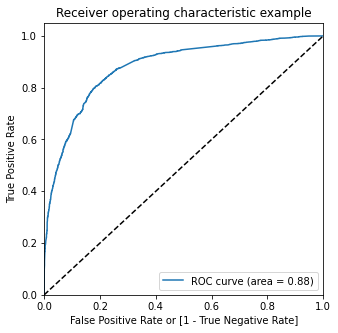

In [533]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

We want the ROC curve to be as close to 1 as possible. Here, we got 0.88 ROC which indicates a good model with good predictive power. Let us check the below details to see if we can arrive at an optimal cutoff point.

- Optimal cutoff probability (prob where we get balanced sensitivity and specificity)

#### Finding optimal cutoff point

In [534]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID  predicted  \
0          0        0.212910  6d26530b-2250-405e-878d-34a2693d1c7e          0   
1          0        0.212910  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0   
2          0        0.210663  d96d1ce9-7fb3-4970-b12a-257429d60218          0   
3          0        0.118243  81666744-c8ed-4da7-9466-09fa71aa4445          0   
4          1        0.983155  278795bb-797e-410e-84d6-38ce64efa3c8          1   

   0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    0    0    0    0    0    0    0  
1    1    1    1    0    0    0    0    0    0    0  
2    1    1    1    0    0    0    0    0    0    0  
3    1    1    0    0    0    0    0    0    0    0  
4    1    1    1    1    1    1    1    1    1    1

In [535]:
# Creating a dataframe to get the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

prob_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prob_cutoff.loc[i] =[ i ,accuracy,sensi,speci]
    
print(prob_cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.555187  0.971178  0.302361
0.2   0.2  0.756671  0.907686  0.664890
0.3   0.3  0.798516  0.844194  0.770754
0.4   0.4  0.814306  0.779449  0.835491
0.5   0.5  0.810674  0.685881  0.886519
0.6   0.6  0.794884  0.578112  0.926631
0.7   0.7  0.780199  0.503759  0.948210
0.8   0.8  0.759198  0.413116  0.969535
0.9   0.9  0.724301  0.289474  0.988576


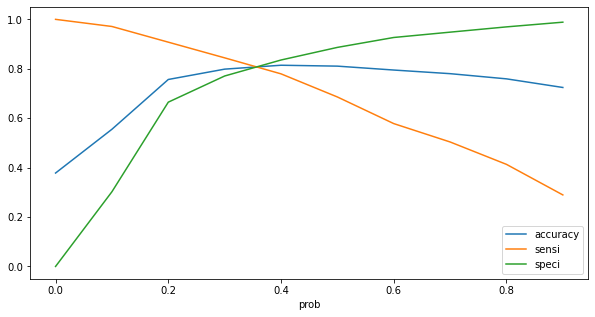

In [536]:
# Plotting accuracy, sensitivity and specificity for various probability cutoff values.

prob_cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (10,5))
plt.show()

#### From the above curve we can infer that 0.35 is the optimum point to take as an optimal cutoff probability.

In [539]:
# Creating dataframe with optimal probability cutoff value as 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob                           Prospect ID  predicted  \
0          0        0.212910  6d26530b-2250-405e-878d-34a2693d1c7e          0   
1          0        0.212910  5304f1cf-86c5-4c41-9b52-c3b1ed715ef5          0   
2          0        0.210663  d96d1ce9-7fb3-4970-b12a-257429d60218          0   
3          0        0.118243  81666744-c8ed-4da7-9466-09fa71aa4445          0   
4          1        0.983155  278795bb-797e-410e-84d6-38ce64efa3c8          1   

   0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    0    0    0    0    0    0    0                0  
1    1    1    1    0    0    0    0    0    0    0                0  
2    1    1    1    0    0    0    0    0    0    0                0  
3    1    1    0    0    0    0    0    0    0    0                0  
4    1    1    1    1    1    1    1    1    1    1                1

In [538]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8072003789673141

**Again we are getting 81% overall accuracy of the model which is a good value.** Now let's check other parameters too.

In [540]:
# Creating confusion matrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3160,  779],
       [ 442, 1952]], dtype=int64)

In [541]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [542]:
# Calculating sensitivity of our logistic regression model
TP / float(TP+FN)

0.8153717627401837

In [543]:
# Calculating specificity of our logistic regression model
TN / float(TN+FP)

0.8022340695608022

In [544]:
# Calculating false postive rate 
print(FP/ float(TN+FP))

0.19776593043919777


In [545]:
# Calculating positive predictive value
print (TP / float(TP+FP))

0.7147564994507506


In [546]:
# Calculating negative predictive value
print (TN / float(TN+ FN))

0.8772903942254303


Following inferences have been drawn based on the values of different matrics:

- Sensitivity = 82% (good)
- Specificity = 80% (good)
- False positive Rate = 20% (moderately low, as required)
- Positive Predictive values = 71% (good)
- Negative Predictive value = 88% (good)

#### Calculating Precision and Recall

In [547]:
# let's calculate precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7147564994507506

In [548]:
# let's calculate recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8153717627401837

#### Precision and recall tradeoff

In [549]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      1
 20      0
 21      1
 22      0
 23      1
 24      0
 25      1
 26      1
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      1
 35      0
 36      0
 37      0
 38      0
 39      1
 40      1
 41      1
 42      0
 43      1
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      1
 51      1
 52      0
 53      1
 54      0
 55      0
 56      0
 57      1
 58      1
 59      1
 60      1
 61      1
 62      0
 63      1
 64      0
 65      0
 66      1
 67      0
 68      1
 69      0
 70      1
 71      1
 72      1
 73      0
 74      0
 75      1
 76      0
 77      1
 78      0
 79      0
 80      0
 81      1
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      1
 90      0

In [550]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

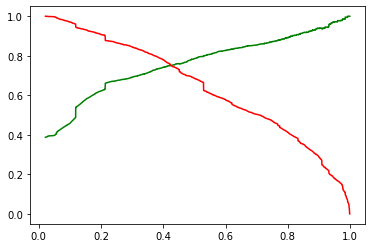

In [551]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Following inferences have been drawn based on the values of different matrics:

- Precision Score = 71% (moderately good)
- Recall Score = 82% (good)

# Step 5: Making predictions on the test data

In [552]:
# Scaling the numerical variables of the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [553]:
# Inspecting the test data
X_test = X_test[col]
X_test.head()

Do Not Email  \
Prospect ID                                          
e856ceb5-8371-4816-8ade-b89e947117d3             0   
ea9ec11d-17d3-400b-a01d-6cd742de744b             0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457             0   
00976672-4554-4b7c-91a8-c3588f78c8c9             0   
96db7867-6215-451c-bc0b-2c4759c62ddb             0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
e856ceb5-8371-4816-8ade-b89e947117d3                    -0.878510   
ea9ec11d-17d3-400b-a01d-6cd742de744b                    -0.582031   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                    -0.086672   
00976672-4554-4b7c-91a8-c3588f78c8c9                    -0.878510   
96db7867-6215-451c-bc0b-2c4759c62ddb                    -0.878510   

                                      Lead Origin_Landing Page Submission  \
Prospect ID                                                                 
e856ceb5-8371-4816-8ade-b89e947117d3                                    0   
ea9ec11d-17d3-400b-a01d-6cd742de744b                                    0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                                    1   
00976672-4554-4b7c-91a8-c3588f78c8c9                                    0   
96db7867-6215-451c-bc0b-2c4759c62ddb                                    0   

                                      Lead Origin_Lead Add Form  \
Prospect ID                                                       
e856ceb5-8371-4816-8ade-b89e947117d3                          0   
ea9ec11d-17d3-400b-a01d-6cd742de744b                          0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                          0   
00976672-4554-4b7c-91a8-c3588f78c8c9                          1   
96db7867-6215-451c-bc0b-2c4759c62ddb                          0   

                                      Lead Origin_Lead Import  \
Prospect ID                                                     
e856ceb5-8371-4816-8ade-b89e947117d3                        0   
ea9ec11d-17d3-400b-a01d-6cd742de744b                        0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                        0   
00976672-4554-4b7c-91a8-c3588f78c8c9                        0   
96db7867-6215-451c-bc0b-2c4759c62ddb                        0   

                                      Lead Source_Olark Chat  \
Prospect ID                                                    
e856ceb5-8371-4816-8ade-b89e947117d3                       1   
ea9ec11d-17d3-400b-a01d-6cd742de744b                       0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                       0   
00976672-4554-4b7c-91a8-c3588f78c8c9                       0   
96db7867-6215-451c-bc0b-2c4759c62ddb                       1   

                                      Lead Source_Welingak Website  \
Prospect ID                                                          
e856ceb5-8371-4816-8ade-b89e947117d3                             0   
ea9ec11d-17d3-400b-a01d-6cd742de744b                             0   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                             0   
00976672-4554-4b7c-91a8-c3588f78c8c9                             1   
96db7867-6215-451c-bc0b-2c4759c62ddb                             0   

                                      Specialization_NA  \
Prospect ID                                               
e856ceb5-8371-4816-8ade-b89e947117d3                  0   
ea9ec11d-17d3-400b-a01d-6cd742de744b                  1   
baba30f7-8da8-4b60-95fa-b1f5f2e3b457                  0   
00976672-4554-4b7c-91a8-c3588f78c8c9                  1   
96db7867-6215-451c-bc0b-2c4759c62ddb                  1   

                                      What is your current occupation_Working Professional  \
Prospect ID                                                                                  
e856ceb5-8371-4816-8ade-b89e947117d3                                                  0      
ea9ec11d-17d3-400b-a01d-6cd742de744b                                     

In [554]:
# Adding constant to X-test
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test data

In [555]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

Prospect ID
e856ceb5-8371-4816-8ade-b89e947117d3    0.773951
ea9ec11d-17d3-400b-a01d-6cd742de744b    0.064707
baba30f7-8da8-4b60-95fa-b1f5f2e3b457    0.115192
00976672-4554-4b7c-91a8-c3588f78c8c9    0.996935
96db7867-6215-451c-bc0b-2c4759c62ddb    0.118243
3750bdb0-8471-4145-b06b-7621c96cfc84    0.086966
fea03509-6acc-499b-96f9-8218a4c2d272    0.978139
d0a8a0aa-fabd-410a-ad18-e88d6d8ab56e    0.996935
c112a51c-5bbb-4427-a787-fecb6aef49a4    0.134780
b66695d8-a169-4b24-920f-d0b79501e350    0.077540
dtype: float64

In [557]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's check the initial few rows
y_pred_1.head()

0
Prospect ID                                   
e856ceb5-8371-4816-8ade-b89e947117d3  0.773951
ea9ec11d-17d3-400b-a01d-6cd742de744b  0.064707
baba30f7-8da8-4b60-95fa-b1f5f2e3b457  0.115192
00976672-4554-4b7c-91a8-c3588f78c8c9  0.996935
96db7867-6215-451c-bc0b-2c4759c62ddb  0.118243

In [559]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [560]:
# Making Prospect ID as an index
y_test_df['Prospect ID'] = y_test_df.index

In [561]:
# Remove index from both the dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [562]:
# Append y_test_df and y_pred_1 dataframes
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [563]:
# Let's check the initial few rows
y_pred_final.head()

Converted                           Prospect ID         0
0          1  e856ceb5-8371-4816-8ade-b89e947117d3  0.773951
1          0  ea9ec11d-17d3-400b-a01d-6cd742de744b  0.064707
2          1  baba30f7-8da8-4b60-95fa-b1f5f2e3b457  0.115192
3          1  00976672-4554-4b7c-91a8-c3588f78c8c9  0.996935
4          0  96db7867-6215-451c-bc0b-2c4759c62ddb  0.118243

In [565]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [566]:
# Let's check the initial few rows
y_pred_final.head()

Converted                           Prospect ID  Converted_Prob
0          1  e856ceb5-8371-4816-8ade-b89e947117d3        0.773951
1          0  ea9ec11d-17d3-400b-a01d-6cd742de744b        0.064707
2          1  baba30f7-8da8-4b60-95fa-b1f5f2e3b457        0.115192
3          1  00976672-4554-4b7c-91a8-c3588f78c8c9        0.996935
4          0  96db7867-6215-451c-bc0b-2c4759c62ddb        0.118243

In [567]:
# Creating dataframe with optimal probability cutoff value as 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [568]:
# Let's check the initial few rows
y_pred_final.head()

Converted                           Prospect ID  Converted_Prob  \
0          1  e856ceb5-8371-4816-8ade-b89e947117d3        0.773951   
1          0  ea9ec11d-17d3-400b-a01d-6cd742de744b        0.064707   
2          1  baba30f7-8da8-4b60-95fa-b1f5f2e3b457        0.115192   
3          1  00976672-4554-4b7c-91a8-c3588f78c8c9        0.996935   
4          0  96db7867-6215-451c-bc0b-2c4759c62ddb        0.118243   

   final_predicted  
0                1  
1                0  
2                0  
3                1  
4                0

#### Checking the different matrics like accuracy, precision and recall

In [569]:
# Let's check the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8036832412523021

In [570]:
# Let's create confusion matrics
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  318],
       [ 215,  819]], dtype=int64)

In [571]:
# Calculating precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7203166226912929

In [572]:
# Calculating recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7920696324951644

In [573]:
# Calculating F1 score
from sklearn.metrics import f1_score
f1_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7544910179640718

Following inferences have been drawn based on the values of different matrics:
- **Accuracy of the test model** = 80% - It shows that our findings are robust and we haven't overfitted the model
- **Precision Score** = 72% - Its a fairly good score
- **Recall Score** = 79.2% - Its also a good score
- **F1-Score** (Model score as a function of precision and recall score.) = 75.44% - It is also a good score 

### Conclusion of the case study

- X Education gets a lot of leads but its lead conversion rate is very poor as there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. So, in order to get higher lead conversion it is required to nurture the potential lead at the middle stage
- To achieve the goal comparny requires to build a model by which we can assign a lead score to the customer. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
- We made a logistic regression model to get the higher lead conversion rate. Here we got a fairly good precision score of 72% which is close to the target goal of 80%. (The model precision score measures the proportion of positively predicted labels that are actually correct)
- Moreover we also want our model to correctly predict most of the actual converted lead. It can only be acheived by the high recall score. In this case we got ~80% recall which is again good score.(Model recall score represents the model’s ability to correctly predict the positives out of actual positives)
- Since, we got a good balance between precision and recall so the company can use this model for correctly predict the hot leads.
- Moreover, this model has 75% F1-score which is again a fairly good score.
- Based on this model we can infer that the higher lead conversion happens in the following cases:
  1. When the lead origin is Lead add format.
  2. When the lead source is Welingak website.
  3. If their current occupation is as a working professional.
  4. If SMS sent is the last notable activity of the lead.